# Read the file 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import time 
begin_time=time.time()


In [3]:
%time df_all = pd.read_csv('final_table_model.csv',dtype={ 'Journey_Pattern_ID': object})

CPU times: user 38.6 s, sys: 14.5 s, total: 53.1 s
Wall time: 1min 1s


In [4]:
#df_all.drop(df_all.columns[[4,5]], axis=1, inplace=True)
df_all.head(3)

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,00010001,0,0,2012-11-06 12:15:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
1,00010001,22,360,2012-11-06 12:21:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
2,00010001,215,397,2012-11-06 12:21:50,12,Tuesday,0,am,6.88,0.0,7.55,16.25


In [5]:
df_all.tail(3)

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
16852097,084X1002,23071,3197,2013-01-29 09:07:03,9,Tuesday,0,am,7.38,0.03,8.32,10.88
16852098,084X1002,23318,3303,2013-01-29 09:08:49,9,Tuesday,0,am,7.38,0.03,8.32,10.88
16852099,084X1002,23665,3478,2013-01-29 09:11:44,9,Tuesday,0,am,7.38,0.03,8.32,10.88


In [6]:
df_all.dtypes

Journey_Pattern_ID     object
Distance                int64
Trip_Time               int64
datetime               object
HourOfDay               int64
day_of_week            object
midweek                 int64
time_bin               object
cloud                 float64
rain                  float64
temp                  float64
wind                  float64
dtype: object

In [7]:
pd.unique(df_all.Journey_Pattern_ID ).size

478

In [6]:
df=df_all

# Train Data set with statsmodels

In [8]:
df.shape

(16852100, 12)

In [35]:
feature_cols = ['Distance','HourOfDay','midweek','cloud','rain','wind','temp']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Index(['Distance', 'HourOfDay', 'midweek', 'cloud', 'rain', 'wind', 'temp'], dtype='object')

In [10]:
import statsmodels.formula.api as sm
df_linear = pd.concat([X, y], axis=1)
%time lm = sm.ols(formula = "Trip_Time ~ Distance+HourOfDay+midweek+cloud+rain+wind+temp", data=df_linear).fit()

In [11]:
lm.params

Intercept    330.786784
Distance       0.177387
HourOfDay     -3.598221
midweek     -209.282461
cloud         -8.368503
rain          56.839499
wind          -1.547951
temp           6.686312
dtype: float64

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Trip_Time   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 9.823e+06
Date:                Mon, 07 Aug 2017   Prob (F-statistic):               0.00
Time:                        19:00:21   Log-Likelihood:            -1.3155e+08
No. Observations:            16852100   AIC:                         2.631e+08
Df Residuals:                16852092   BIC:                         2.631e+08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    330.7868      0.701    471.864      0.000     329.413     332.161
Distance       0.1774   2.15e-05   8260.852      0.000       0.177       0.177
HourOfDay     -3.5982      0.031   -115.980      0.000      -3.659      -3.537
midweek     -209.2825      0.392   -534.538      0.000    -210.050    -208.515
cloud         -8.3685      0.081   -102.972      0.000      -8.528      -8.209
rain          56.8395      0.484    117.333      0.000      55.890      57.789
wind          -1.5480      0.031    -50.699      0.000      -1.608      -1.488
temp           6.6863      0.047    141.752      0.000       6.594       6.779
==============================================================================
Omnibus:                  2502848.874   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12096719.747
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                       6.945   Cond. No.                     6.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
lm_predictions = lm.predict(X)

In [29]:
df.head()

,Journey_Pattern_ID,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek,time_bin,cloud,rain,temp,wind
0,00010001,0,0,2012-11-06 12:15:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
1,00010001,22,360,2012-11-06 12:21:13,12,Tuesday,0,am,6.88,0.0,7.55,16.25
2,00010001,215,397,2012-11-06 12:21:50,12,Tuesday,0,am,6.88,0.0,7.55,16.25
3,00010001,264,418,2012-11-06 12:22:11,12,Tuesday,0,am,6.88,0.0,7.55,16.25
4,00010001,439,440,2012-11-06 12:22:33,12,Tuesday,0,am,6.88,0.0,7.55,16.25


In [37]:
lm.predict(X.head())
#Distance+HourOfDay+midweek+cloud+rain+wind+temp

0    255.360298
1    259.262807
2    293.498459
3    302.190412
4    333.233102
dtype: float64

In [28]:
#df.plot(kind='scatter', x='Distance', y='Trip_Time')
# plt.plot(X['Distance'], lm_predictions, c='red', linewidth=2)

#plt.savefig('SM_Linear_Reg.png')

In [15]:
lm.conf_int()

,0,1
Intercept,329.412808,332.160759
Distance,0.177345,0.177429
HourOfDay,-3.659028,-3.537414
midweek,-210.049827,-208.515094
cloud,-8.527788,-8.209217
rain,55.890033,57.788965
wind,-1.607792,-1.488109
temp,6.593863,6.778762


In [16]:
# MSE: Mean Squared Error
mse=((df_linear.Trip_Time-lm.predict(df_linear))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 353074.658828


In [17]:
# MAE:  Mean Absolute mean 
mae = abs(df_linear.Trip_Time-lm.predict(df_linear)).mean()
print("Mean Absolute mean ",mae)

Mean Absolute mean  436.961716179


# Use LinearRegression to train data set without weather feature 

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [7]:
feature_cols = ['Distance','HourOfDay','midweek']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

Index(['Distance', 'HourOfDay', 'midweek'], dtype='object')

In [8]:
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
%time pipeline.fit(X, y)

#df.plot(kind='scatter', x='Distance', y='Trip_Time',label="Samples")
#plt.plot(X['Distance'], pipeline.predict(X), c='Blue', label="Model")

#plt.savefig('Linear_Reg_Poly.png')

CPU times: user 13.8 s, sys: 18.9 s, total: 32.6 s
Wall time: 43.1 s


Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [9]:
pipeline.score(X,y)

0.81978845296301661

In [14]:
# MAE:  Mean Absolute mean 
mae = abs(y-pipeline.predict(X)).mean()
print("Mean Absolute mean ",mae)

Mean Absolute mean  420.137739952


In [11]:
# MAE:  Mean Percentage Absolute Error 

# Mean  Percentage  Absolute Error  of linear:  0.128071279637
mpae = (abs(y-pipeline.predict(X))).sum()/y.sum()
print("Mean  Percentage  Absolute Error ",mpae)

Mean  Percentage  Absolute Error  0.207264784096


In [13]:
import pickle
pickle.dump(pipeline, open('linear_model', 'wb'))

# Use LinearRegression to train data set with weather feature 

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [8]:
feature_cols = ['Distance','HourOfDay','midweek','rain']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

Index(['Distance', 'HourOfDay', 'midweek', 'rain'], dtype='object')

In [9]:
y.shape

(16852100,)

In [10]:
X.dtypes

Distance       int64
HourOfDay      int64
midweek        int64
rain         float64
dtype: object

In [11]:
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
%time pipeline.fit(X, y)

#df.plot(kind='scatter', x='Distance', y='Trip_Time',label="Samples")
#plt.plot(X['Distance'], pipeline.predict(X), c='Blue', label="Model")

#plt.savefig('Linear_Reg_Poly.png')

CPU times: user 25.2 s, sys: 46.4 s, total: 1min 11s
Wall time: 1min 54s


Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [12]:
pipeline.named_steps['linear_regression'].get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [13]:
%time pipeline.score(X,y)

CPU times: user 8.9 s, sys: 9.03 s, total: 17.9 s
Wall time: 23.7 s


0.81989995394692972

In [14]:
pipeline.get_params()

{'linear_regression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': True,
 'linear_regression__n_jobs': 1,
 'linear_regression__normalize': False,
 'polynomial_features': PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
 'polynomial_features__degree': 2,
 'polynomial_features__include_bias': False,
 'polynomial_features__interaction_only': False,
 'steps': [('polynomial_features',
   PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
  ('linear_regression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]}

In [15]:
# MAE:  Mean Absolute mean 
mae = abs(y-pipeline.predict(X)).mean()
print("Mean Absolute mean ",mae)

Mean Absolute mean  420.074239937


In [16]:
# MAE:  Mean Percentage Absolute Error 

# Mean  Percentage  Absolute Error  of linear:  0.128071279637
mpae = (abs(y-pipeline.predict(X))).sum()/y.sum()
print("Mean  Percentage  Absolute Error ",mpae)

Mean  Percentage  Absolute Error  0.2072334579


In [17]:
pipeline.predict(X.head())

array([ 273.47297127,  277.9802564 ,  317.47803272,  327.49356122,
        363.22229975])

In [21]:
import pandas as pd
feature_cols = ['Distance','midweek','HourOfDay']
def get_time(distance,mid_week,hour):
    params = [{
           'Distance': distance,
           'midweek':mid_week,
           'HourOfDay':hour,
           'rain':rain
    }]
    df = pd.DataFrame(params)
    print(df)

    estimated_time = pipeline.predict(df)
    print
    return estimated_time
distance=4830
mid_week=1
hour=12
rain=0
get_time(distance,mid_week,hour)

   Distance  HourOfDay  midweek  rain
0      4830         12        1     0


array([ 1055.59483546])

In [18]:
pipeline.predict([4830,1,12,0])

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([-27128.30438967])

df.plot(kind='scatter', x='Distance', y='Trip_Time')
plt.plot(X['Distance'], lm_sk_predictions, c='red')
plt.legend(loc="best")
plt.savefig('SM_Linear_Reg.png')

In [20]:
import pickle
pickle.dump(pipeline, open('linear_model_all', 'wb'))

# Train all data set with Random Forest 

In [21]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.multioutput import MultiOutputRegressor

In [22]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#sklearn.ensemble.RandomForestRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth,random_state=2)

In [23]:
X.dtypes

Distance       int64
HourOfDay      int64
midweek        int64
rain         float64
dtype: object

In [24]:
X.head()

,Distance,HourOfDay,midweek,rain
0,0,12,0,0.0
1,22,12,0,0.0
2,215,12,0,0.0
3,264,12,0,0.0
4,439,12,0,0.0


In [25]:
%time regr_rf.fit(X,y)

CPU times: user 9min 54s, sys: 6.15 s, total: 10min
Wall time: 10min 5s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [26]:
regr_rf.score(X,y)

0.87535624457291727

In [27]:
y_regr_rf=regr_rf.predict(X)

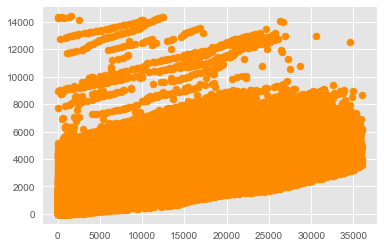

In [29]:
#plt.scatter(X['Distance'],y,color='blue', lable='Data')
#plt.plot(X['Distance'],y_regr_rf, color='red', lable='Random Forest')

plt.scatter(X['Distance'], y, color='darkorange', label='data')
#plt.savefig('RF_result.png')


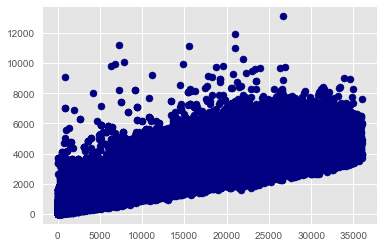

In [30]:
plt.scatter(X['Distance'], y_regr_rf, color='navy', label='MRF model')
#plt.get_backend()

In [31]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y-y_regr_rf).mean()
print("Mean Absolute Error of RF ",mae)

Mean Absolute Error of RF  339.632415066


In [32]:
# MAE:  Mean Percentage Absolute Error 

# Mean  Percentage  Absolute Error  of linear:  0.128071279637
mpae = (abs(y-y_regr_rf)).sum()/y.sum()
print("Mean  Percentage  Absolute Error ",mpae)

Mean  Percentage  Absolute Error  0.167549430786


In [36]:
#import pickle
#pickle.dump(regr_rf, open('regr_rf_model', 'wb'))

import pickle
pickle.dump(regr_rf, open('rfmodle.sav', 'wb'))

OSError: [Errno 22] Invalid argument

# Train all data with Journey Pattern ID 
## Don't need any more 

# splite our data to train and test data set and check our model result 


# Linear Regression 

In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
polynomial_features = PolynomialFeatures(degree=1,include_bias=False)
linear_regression = LinearRegression()
pipeline_train = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
%time pipeline_train.fit(X_train, y_train)

In [ ]:
pipeline_train.score(X_train,y_train)

In [ ]:
pipeline_train.score(X_test,y_test)

In [ ]:
# MAE:  Mean Absolute Error  of Training Data 

mae = abs(y_train-pipeline_train.predict(X_train)).mean()
print("Mean Absolute Error of RF ",mae)

In [ ]:
# MAE:  Mean Absolute Error of Testing Data 
 
mae = abs(y_test-pipeline_train.predict(X_test)).mean()
print("Mean Absolute Error of RF ",mae)

# Random Forest 

In [ ]:
max_depth = 30
regr_rf_Train = RandomForestRegressor(max_depth=max_depth,random_state=2)

In [ ]:
%time regr_rf_Train.fit(X_train,y_train)

In [ ]:
regr_rf_Train.score(X_train,y_train)

In [ ]:
regr_rf_Train.score(X_test,y_test)

In [ ]:
# MAE:  Mean Absolute Error of training data set


mae = abs(y_train-regr_rf.predict(X_train)).mean()
print("Mean Absolute Error of RF ",mae)

In [ ]:
# MAE:  Mean Absolute Error of testing data set 

mae = abs(y_test-regr_rf.predict(X_test)).mean()
print("Mean Absolute Error of RF ",mae)

In [ ]:
# MAE:  Mean Percentage Absolute Error 

# Mean  Percentage  Absolute Error  of linear:  0.128071279637
mpae = (abs(y_test-regr_rf.predict(X_test))).sum()/y.sum()
print("Mean  Percentage  Absolute Error ",mpae)

In [ ]:
End_time=time.time()
Duringtime=End_time-begin_time
print("The time used is ",Duringtime//60)

# Pickle our model and read the model to predict 

In [26]:
import pickle 
filename_all='linear_model_all'
filename='linear_model'
loaded_model_all = pickle.load(open(filename_all, 'rb'))

In [27]:
# loaded_model_all.predict([4830,1,12,0])

In [28]:
loaded_model = pickle.load(open(filename, 'rb'))


In [29]:
import pandas as pd
feature_cols = ['Distance','midweek','HourOfDay']
def get_time(distance,mid_week,hour):
    params = [{
           'Distance': distance,
           'midweek':mid_week,
           'HourOfDay':hour,
           'rain':rain
    }]
    df = pd.DataFrame(params)
    print(df)

    estimated_time = loaded_model_all.predict(df)
    print
    return estimated_time
distance=4830
mid_week=1
hour=12
rain=0
get_time(distance,mid_week,hour)

   Distance  HourOfDay  midweek  rain
0      4830         12        1     0


array([ 1055.59483546])

In [31]:
import pandas as pd
feature_cols = ['Distance','midweek','HourOfDay']
def get_time(distance,mid_week,hour):
    params = [{
           'Distance': distance,
           'midweek':mid_week,
           'HourOfDay':hour,
    }]
    df = pd.DataFrame(params)
    print(df)

    estimated_time = loaded_model.predict(df)
    print
    return estimated_time
distance=4830
mid_week=1
hour=12
get_time(distance,mid_week,hour)

   Distance  HourOfDay  midweek
0      4830         12        1


array([ 1055.51860124])